### Importing Libraries

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objects as go
import re
from wordcloud import WordCloud
from textblob import TextBlob
import textwrap

### Read the Data

In [442]:
ecommerceData = pd.read_csv("C://Users//Logiya Vidhyapathy//Documents//KGISL Data Science//Python Task//MileStone 1 Project//e-commerce_data.csv")
ecommerceData

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

### Data Info

In [443]:
ecommerceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### Dropping Columns

In [444]:
ecommerceData = ecommerceData.drop(['product_id', 'user_id', 'user_name', 'review_id', 'img_link', 'product_link'], axis = 1)

In [445]:
# ecommerceData

In [446]:
# ecommerceData.info()

### Replacing Values

In [447]:

ecommerceData[['discounted_price', 'actual_price']] = ecommerceData[['discounted_price', 'actual_price']].apply(lambda column : column.str.replace('₹', ''))

In [448]:
ecommerceData['discount_percentage'] = ecommerceData['discount_percentage'].str.replace('%', '')

### Converting DataType

In [449]:
ecommerceData[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']] = ecommerceData[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].apply(lambda column : pd.to_numeric(column.str.replace(',', ''), errors = 'coerce'))

### Converting discount percentage into decimal form

In [450]:
ecommerceData['discount_percentage'] = ecommerceData['discount_percentage'] / 100

In [451]:
ecommerceData.dtypes

product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
review_title            object
review_content          object
dtype: object

In [452]:
# ecommerceData

### Checking Null Values

In [453]:
ecommerceData.isnull().any()

product_name           False
category               False
discounted_price       False
actual_price           False
discount_percentage    False
rating                  True
rating_count            True
about_product          False
review_title           False
review_content         False
dtype: bool

### Retrieving the Null Values Row

In [454]:
ecommerceData[pd.isna(ecommerceData['rating'])]

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,NaN,992.0,No Installation is provided for this product|1...,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."


In [455]:
ecommerceData[pd.isna(ecommerceData['rating_count'])]

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
282,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,Awesome Product,Quick delivery.Awesome ProductPacking was good...


### Rating and Rating Count Mean and Median Values

In [456]:
print(ecommerceData[['rating', 'rating_count']].mean())
print(ecommerceData[['rating', 'rating_count']].median())

rating              4.096585
rating_count    18295.541353
dtype: float64
rating             4.1
rating_count    5179.0
dtype: float64


### Replacing Null Values with Median Value

In [457]:
ecommerceData[['rating', 'rating_count']] = ecommerceData[['rating', 'rating_count']].apply(lambda column : column.fillna(column.median(), axis = 0))


In [458]:
ecommerceData.isnull().any()

product_name           False
category               False
discounted_price       False
actual_price           False
discount_percentage    False
rating                 False
rating_count           False
about_product          False
review_title           False
review_content         False
dtype: bool

### Splitting the Category Values

In [459]:
ecommerceSplitCategory = ecommerceData['category'].str.split('|', expand = True)
ecommerceSplitCategory

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [460]:
# print(ecommerceSplitCategory[0].value_counts())
# print(ecommerceSplitCategory[0].count())

# print(ecommerceSplitCategory[1].value_counts())
# print(ecommerceSplitCategory[1].count())

### Rename the Category Column Name

In [461]:
ecommerceSplitCategory = ecommerceSplitCategory.rename(columns = {0 : 'category', 1 : 'product_type'})
ecommerceSplitCategory

,category,product_type,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


### Drop the Category Column

In [462]:
ecommerceData = ecommerceData.drop(['category'], axis = 1)
# ecommerceData

### Merge the Category and Product Type Columns

In [463]:
ecommerceData['category'] = ecommerceSplitCategory['category']

In [464]:
ecommerceData['product_type'] = ecommerceSplitCategory['product_type']

In [465]:
# ecommerceData.info()

In [570]:
ecommerceData['category'].unique()

array(['Computers & Accessories', 'Electronics', 'Musical Instruments',
       'Office Products', 'Home & Kitchen', 'Home Improvement',
       'Toys & Games', 'Car & Motorbike', 'Health & Personal Care'],
      dtype=object)

In [467]:
# ecommerceData['product_type'].unique()

In [468]:
# ecommerceData[['category', 'product_type']] = ecommerceData[['category', 'product_type']].apply(lambda column : column.str.replace('&', ' & '))

### Replacing the values in product_type and category columns

In [469]:
ecommerceData['product_type'] = ecommerceData['product_type'].replace(',', ', ')

In [470]:
def splitStr(value): 
    return value.apply(lambda columnVal : re.sub(r'(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])', ' ', columnVal).replace('&', ' & '))

In [471]:
ecommerceData[['category', 'product_type']] = ecommerceData[['category', 'product_type']].apply(lambda columns : splitStr(columns))

In [472]:
# ecommerceData

In [473]:
# ecommerceData['rating'].unique()

### Categorize the values in the Rating column

In [474]:
rating_score = []

for rating_category in ecommerceData['rating']:
    if rating_category < 2.0:
        rating_score.append('Poor')
    elif rating_category < 3.0:
        rating_score.append('Below Average')
    elif rating_category < 4.0:
        rating_score.append('Average')
    elif rating_category < 5.0:
        rating_score.append('Above Average')
    elif rating_category == 5.0:
        rating_score.append('Excellent')


In [475]:
ecommerceData['rating_score'] = rating_score
# ecommerceData.head()

### Calculate the price difference between the actual_price and the discounted_price

In [476]:
ecommerceData['difference_price'] = ecommerceData['actual_price'] - ecommerceData['discounted_price']
# ecommerceData.tail()

In [477]:
# ecommerceData['review_sentiment'].value_counts()

In [478]:
# ecommerceData.head()

### Pivot Table for Product Count

In [479]:
ecommerceData['product_count'] = range(0, len(ecommerceData))
ecommerceData

productColumns = ecommerceData[['category', 'product_type', 'product_count']]

productPivotTable = pd.pivot_table(productColumns, index = ['category', 'product_type'], aggfunc = 'count')
productPivotTable

product_count
category                product_type                                               
Car & Motorbike         Car Accessories                                           1
Computers & Accessories Accessories & Peripherals                               381
                        Components                                                5
                        External Devices & Data Storage                          18
                        Laptops                                                   1
                        Monitors                                                  2
                        Networking Devices                                       34
                        Printers,Inks & Accessories                              11
                        Tablets                                                   1
Electronics             Accessories                                              14
                        Cameras & Photography                                    16
                        General Purpose Batteries & Battery Chargers             14
                        Headphones,Earbuds & Accessories                         66
                        Home Audio                                               16
                        Home Theater,TV & Video                                 162
                        Mobiles & Accessories                                   161
                        Power Accessories                                         1
                        Wearable Technology                                      76
Health & Personal Care  Home Medical Supplies & Equipment                         1
Home & Kitchen          Craft Materials                                           7
                        Heating,Cooling & Air Quality                           116
                        Home Storage & Organization                              16
                        Kitchen & Dining                                          1
                        Kitchen & Home Appliances                               308
Home Improvement        Electrical                                                2
Musical Instruments     Microphones                                               2
Office Products         Office Electronics                                        4
                        Office Paper Products                                    27
Toys & Games            Arts & Crafts                                             1

### Top 5 Categories with Highest Ratings

In [565]:
ratingAverage = ecommerceData.groupby('category')['rating'].mean().reset_index().round(2)
ratingAverage = ratingAverage.sort_values('rating', ascending = False)

categoriesHighestRatings = ratingAverage.head(5)
categoriesHighestRatings

,category,rating
7,Office Products,4.31
8,Toys & Games,4.30
5,Home Improvement,4.25
1,Computers & Accessories,4.15
2,Electronics,4.08


### Bar Plot for Top Purchased Items by Category and Products

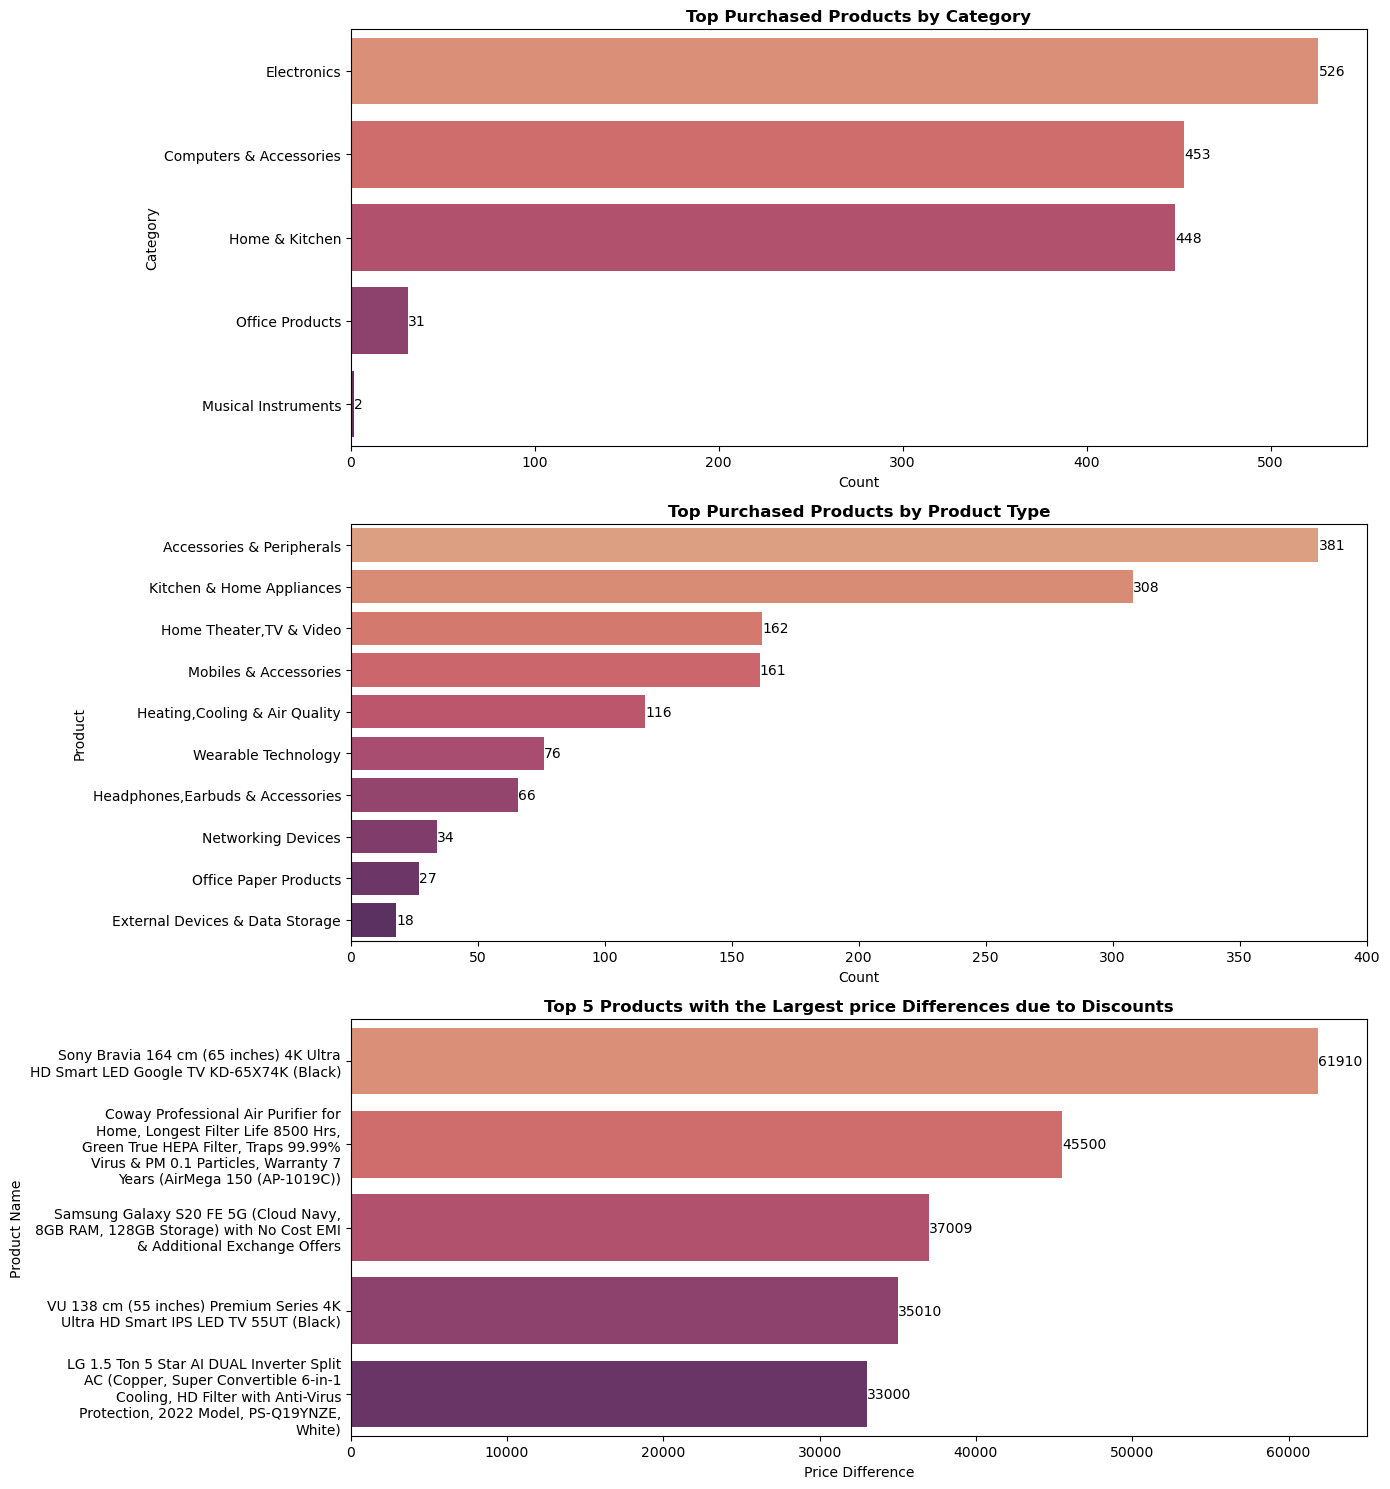

In [550]:
mostPurchasedCategoryItems = ecommerceData['category'].value_counts().head(5).rename_axis('Category').reset_index(name = 'Count')
# print(mostPurchasedCategoryItems)

mostPurchasedProductItems = ecommerceData['product_type'].value_counts().head(10).rename_axis('Product').reset_index(name = 'Count')
# print(mostPurchasedProductItems)

fig, ax = plt.subplots(3, 1, figsize = (14, 15))
# plt.subplots_adjust(hspace = 0.5)

sns.barplot(ax = ax[0], data = mostPurchasedCategoryItems, x = 'Count', y = 'Category', palette = 'flare')
ax[0].set_title("Top Purchased Products by Category", fontweight = 'bold')
ax[0].bar_label(ax[0].containers[0])

sns.barplot(ax = ax[1], data = mostPurchasedProductItems, x = 'Count', y = 'Product', palette = 'flare')
ax[1].set_title("Top Purchased Products by Product Type", fontweight = 'bold')
ax[1].bar_label(ax[1].containers[0])

sns.barplot(ax = ax[2], data = ecommerceData.sort_values('difference_price', ascending = False).head(5), x = "difference_price", y = "product_name", palette = "flare")
ax[2].set_title("Top 5 Products with the Largest price Differences due to Discounts", fontweight = "bold")
ax[2].set_xlabel("Price Difference")
ax[2].set_ylabel("Product Name")
ax[2].bar_label(ax[2].containers[0])

plt.tight_layout()

plt.show()

#### -Top Purchased Products by Category
The __bar plot__ shows the top purchased products by category. __Electronics__ is the __most purchased category__, followed by __Computer & Accessories__. This indicates that these two categories are the most popular among customers compared to other categories.

#### -Top Purchased Products by Product Type
The __bar plot__ shows the top purchased products by product. __Accessories & Peripherals__ is the __most purchased product__, followed by __Kitchen & Home Appliances__. This suggests that these two product types are the most popular among customers compared to other products.

#### -Top 5 Products with the Largest price Differences due to Discounts
The __bar plot__ displays the top 5 products with the largest price differences due to discounts. __Sony Bravia 164 4K Ultra HD Smart LED Google TV__ has the __greatest price difference__ at __61910__ after the discount, followed by __Coway Professional Air Purifier__ at __45,500__. This indicates that these two products have the largest price differences due to discounts compared to the other three products.

### Point Plot for Top 5 Expensive and Cheapest Products 

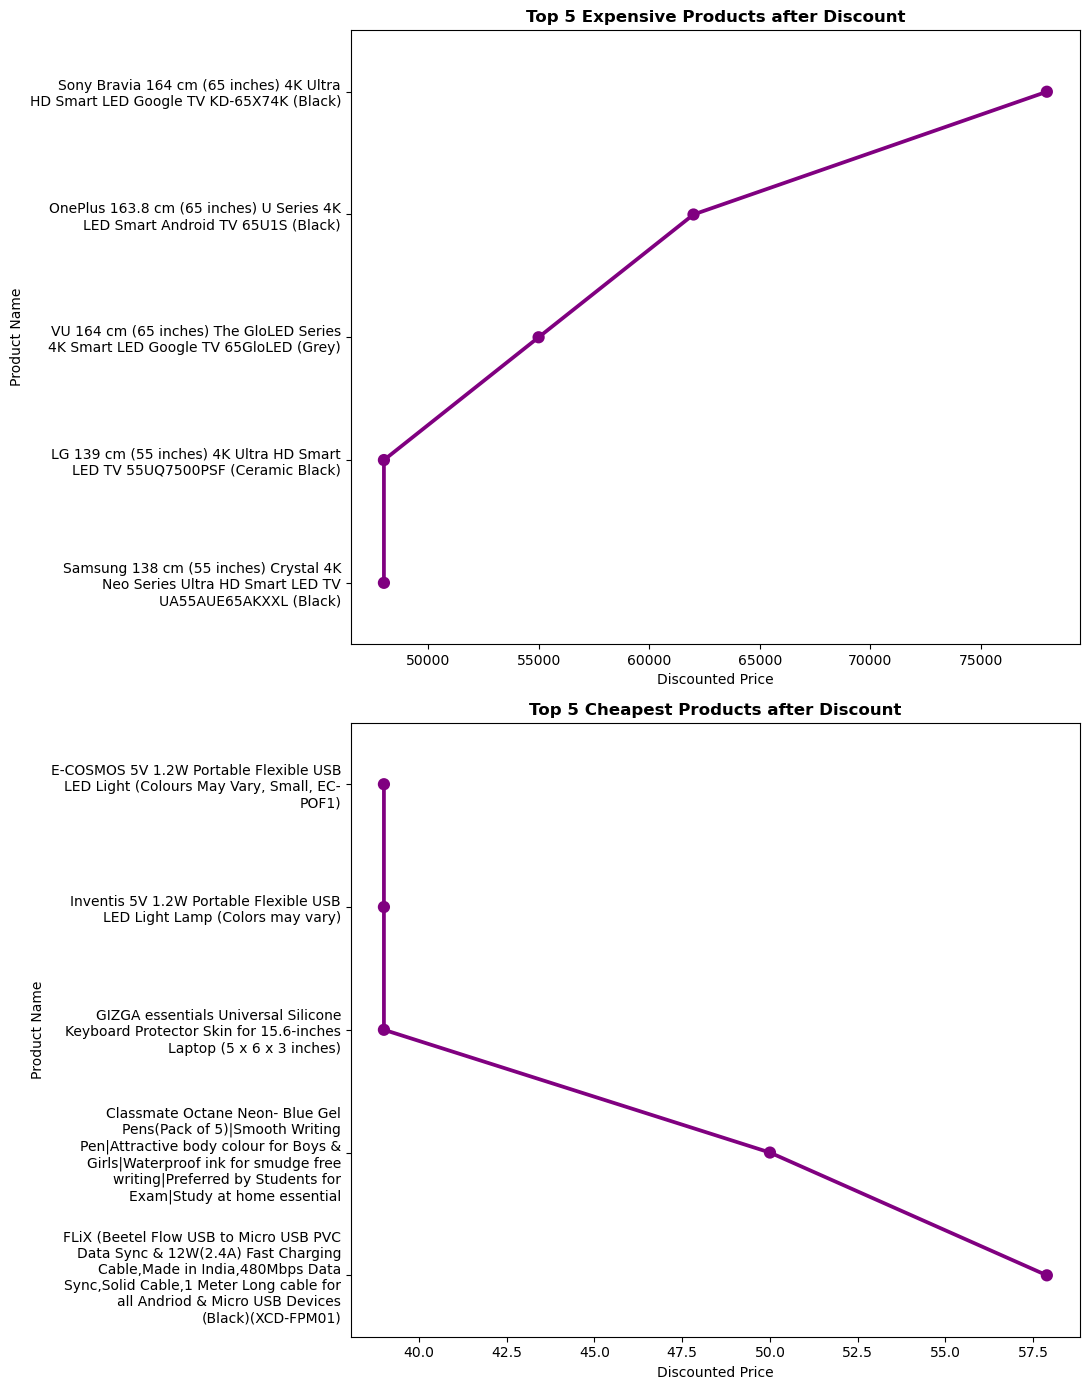

In [538]:
ecommerceData['product_name'] = pd.Series(ecommerceData['product_name'])
ecommerceData['product_name'] = ecommerceData['product_name'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=40)))

fig, ax = plt.subplots(2, 1, figsize = (11, 14))

sns.pointplot(ax = ax[0], data = ecommerceData.sort_values('discounted_price', ascending = False).head(5), x = 'discounted_price', y = 'product_name', color = "purple")
ax[0].set_title("Top 5 Expensive Products after Discount", fontweight = 'bold')
ax[0].set_xlabel("Discounted Price")
ax[0].set_ylabel("Product Name")

sns.pointplot(ax = ax[1], data = ecommerceData.sort_values('discounted_price').head(5), x = 'discounted_price', y = 'product_name', color = "purple")
ax[1].set_title("Top 5 Cheapest Products after Discount", fontweight = 'bold')
ax[1].set_xlabel("Discounted Price")
ax[1].set_ylabel("Product Name")

plt.tight_layout()

plt.show()

#### -Top 5 Expensive Products after Discount
The __point plot__ shows the top 5 expensive products after discounts. __Sony Bravia 164 4K Ultra HD Smart LED Google TV__ is the priciest followed by __OnePlus U Series 4K LED Smart Android TV__. This indicates that these two products are the most expensive compared to the other three products.

#### -Top 5 Cheapest Products after Discount
The __point plot__ displays the top 5 cheapest products after discounts. __E-COSMOS 5V 1.2W Portable Flexible USB LED Light__ is the least expensive followed by the __Inventis 5V 1.2W Portable Flexible USB LED Light Lamp__. This indicates that these two products are the cheapest compared to the other three products.

In [482]:
ecommerceData = ecommerceData.drop(['product_count'], axis = 1)
# ecommerceData

### Correlation between Features using Heatmap

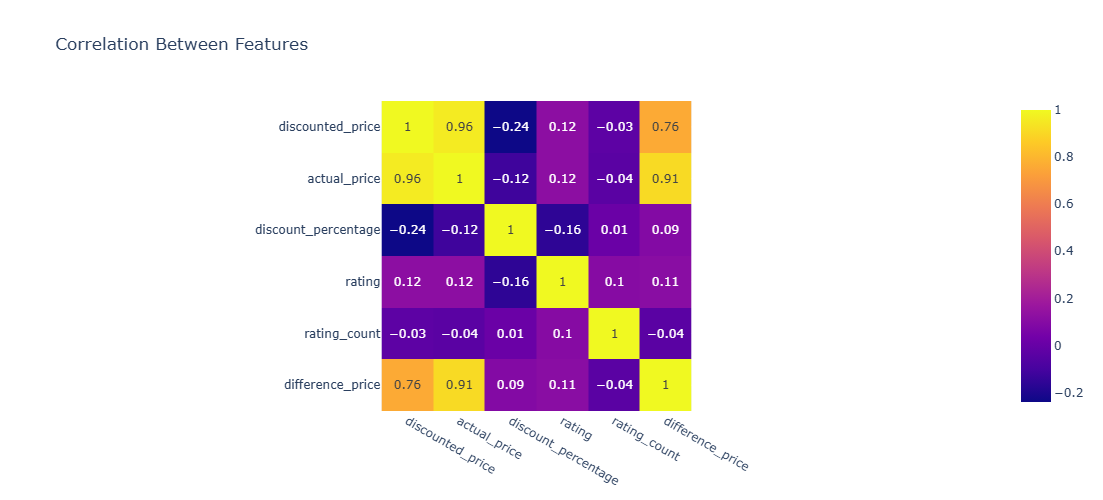

In [483]:

ecommerceDataCorr = ecommerceData[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'difference_price']]

ecommerceCorrelationMatrix = ecommerceDataCorr.corr().round(2)

ecommerceCorrelationMatrix

fig = pt.imshow(ecommerceCorrelationMatrix, text_auto = True, title = "Correlation Between Features")
fig.layout.width = 900
fig.layout.height = 500
fig.show()

#### The heatmap shows correlations between various factors in the dataset:
- __Actual Price and Discounted Price:__ There is a __strong positive correlation__, indicating that higher original prices often lead to higher discounted prices.
- __Discount Percentage and Actual Price:__ This __correlation is negative__, suggesting that as the original price increases, the percentage discount tends to decrease.
- __Discount Percentage and Discounted Price:__ There is a __positive correlation__, indicating that higher discounts are associated with lower discounted prices.
- __Rating and Rating Count:__ There is a __positive correlation__, implying that products with higher ratings tend to have more reviews.
- __Difference Price and Actual Price:__ This __correlation is likely positive__, indicating that larger differences between original and discounted prices are more common with higher original prices.


### Correlation between Actual Price and Discounted Price using Linear Regression Plot

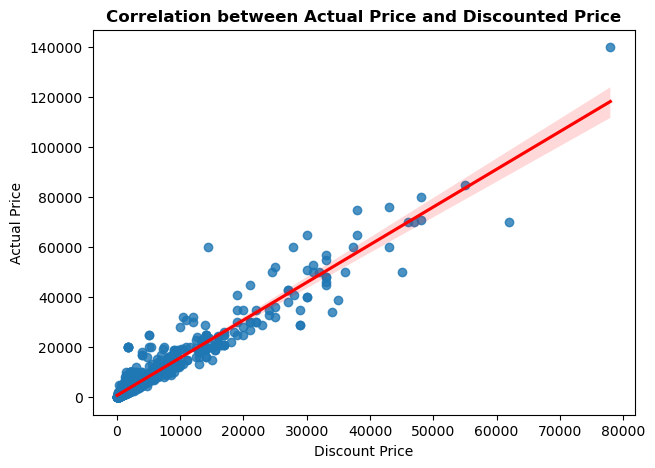

In [574]:
plt.figure(figsize = (7, 5))

sns.regplot(data = ecommerceData, x = "discounted_price", y = "actual_price", line_kws = dict(color = 'red'))
plt.title("Correlation between Actual Price and Discounted Price", fontweight = "bold")
plt.xlabel("Discount Price")
plt.ylabel("Actual Price")
    
plt.show()

#### 
The __scatter plot__ illustrates a __clear positive correlation__ between the __actual prices and discounted prices of products__. As __actual prices increase__, __discounted prices__ also __tend to increase proportionally__. This suggests that products with higher initial prices also receive higher discounts, potentially influencing purchasing decisions based on perceived value and affordability.

### Histogram of Product Ratings and Discount Percentage

C:\Users\Logiya Vidhyapathy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Logiya Vidhyapathy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



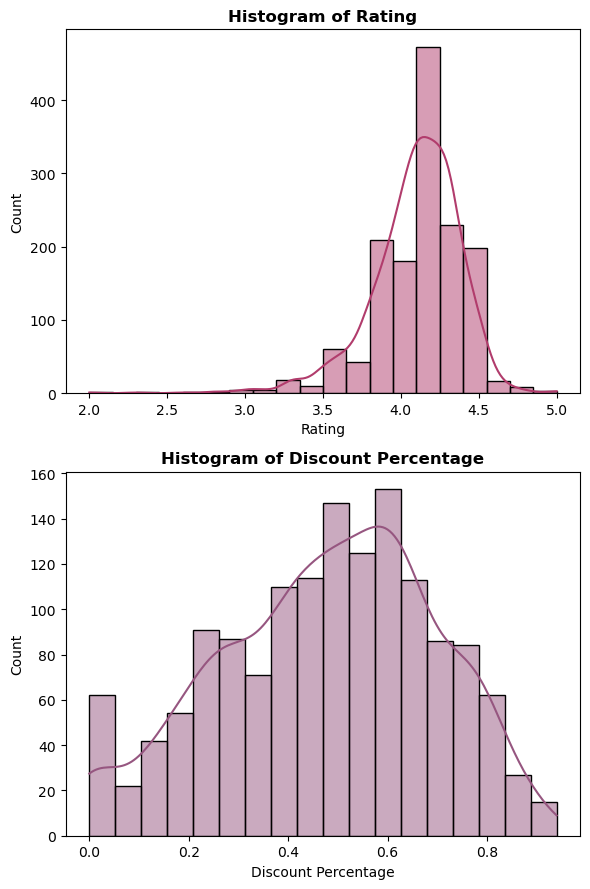

In [485]:
fig, ax = plt.subplots(2, 1, figsize = (6, 9))

sns.histplot(ax = ax[0], data = ecommerceData, x = "rating", color = sns.color_palette("flare")[3], kde = True, bins = 20)
ax[0].set_title("Histogram of Rating", fontweight = "bold")
ax[0].set_xlabel("Rating")

sns.histplot(ax = ax[1], data = ecommerceData, x = "discount_percentage", color = sns.color_palette("ch:s=-.2,r=.6")[3], kde = True)
ax[1].set_title("Histogram of Discount Percentage", fontweight = "bold")
ax[1].set_xlabel("Discount Percentage")

fig.tight_layout()

plt.show()

#### -Histogram of Rating
The __histogram__ shows that most product ratings fall within the range of __4.0 to 4.3__, with __no ratings below 2.0__. The distribution of ratings is __slightly left-skewed__, indicating a __concentration of higher ratings__.

#### -Histogram of Discount Percentage
In the __histogram__, the majority of products in the dataset exhibit discounts __ranging between 48% and 63%__. This range indicates that discounts are encountered around this interval, with __fewer products__ showing __discounts below 48% or above 63%__.

### Rating Distribution by Category using Box Plot

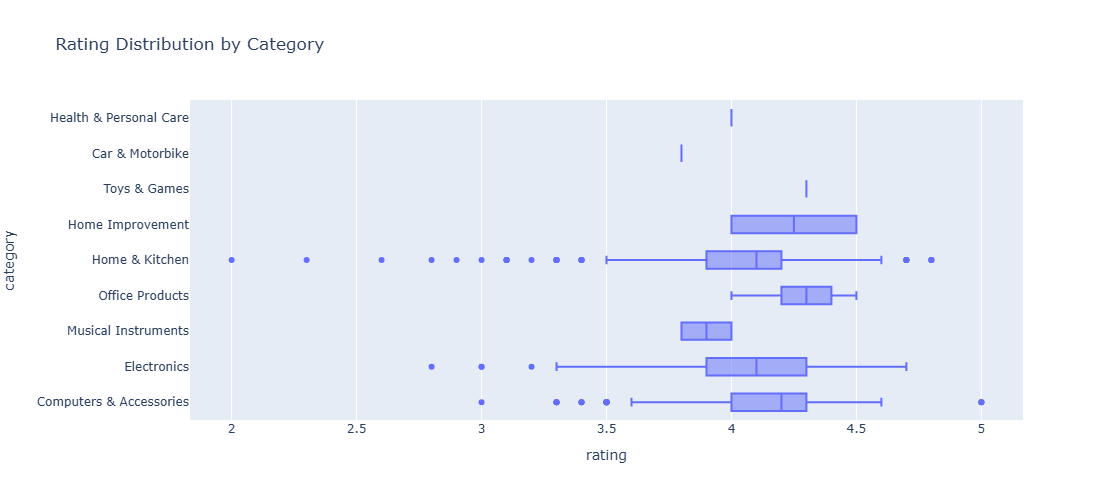

In [486]:

fig = pt.box(ecommerceData, x = "rating", y = "category", title = "Rating Distribution by Category", width = 1000, height = 500)
fig.show()

#### The Box plot illustrates the rating distribution by category:
- __Computers & Accessories and Electronics category__ have ratings mostly between __3.3 and 4.7__, with some products rated __as high as 5.0__ and __as low as 2.75__.
- __Toys & Games, Cars & Motorbike and Health & Personal Care category__ generally have ratings ranging from __3.75 to 4.37__.
- __Home Improvement and Office Products categories__ consistently have a __minimum rating of 4.0__.
- __Home & Kitchen category__ shows a wide range of ratings, from a __high of 4.75 to a low of 2.0__, the lowest rating across all categories. Most products in this category have __ratings between 3.5 and 4.6__.

Overall, __Home & Kitchen category__ exhibit the __broadest variation in ratings__, while __Home Improvement and Office Products__ maintain consistently __higher ratings__.


### The Ratings of all Products in Percentage using Bar Plot

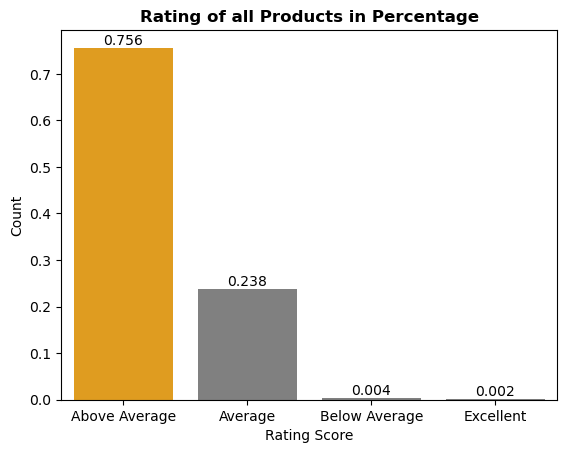

In [487]:

ratingScoreCount = ecommerceData['rating_score'].value_counts(normalize = True).round(3).rename_axis("Rating Score").reset_index(name = 'Count')

colorVal = ['grey' if value < max(ratingScoreCount['Count']) else 'orange' for value in ratingScoreCount['Count']]

ratingScorePercentage = sns.barplot(data = ratingScoreCount, x = "Rating Score", y = "Count", palette = colorVal)
# ratingScorePercentage = sns.pointplot(data = ratingScoreCount, x = "Rating Score", y = "Count", color = 'green')
ratingScorePercentage.set_title("Rating of all Products in Percentage", fontweight = 'bold')
ratingScorePercentage.bar_label(ratingScorePercentage.containers[0])
plt.show()

#### 
The __bar plot__ indicates that the __majority of products__ in the dataset are rated as __Above Average and Average__. There are very few products with ratings classified as __Below Average and Excellent__, and __no products__ have been rated as __Poor__.

### Sentiment Analysis for Overall Review Content

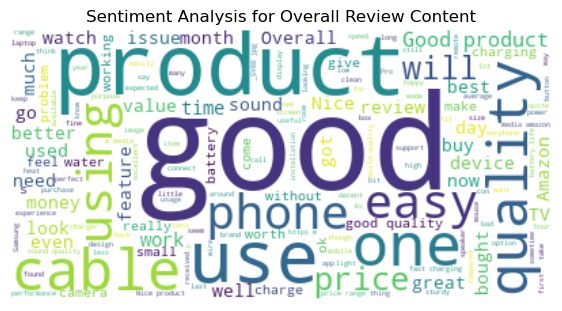

In [566]:
concatenateStrings = ' '.join(ecommerceData['review_content'])
# concatenateStrings

wordCloud = WordCloud(collocations = True, background_color = 'white').generate(concatenateStrings)

plt.figure(figsize = (7,8))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.title("Sentiment Analysis for Overall Review Content")
plt.axis('off')
plt.show()

#### -Sentiment Analysis for Overall Reviews

The sentiment analysis for __overall reviews__ shows customers express positive sentiments like __‘good’, ‘best’ and ‘look’__ indicating __widespread satisfaction with product quality and usability__. However, terms such as __‘poor’, ‘low’, ‘slow’ and ‘bad’__ also appear, suggesting areas for __improvement in product reliability and customer service__. This visualization captures diverse customer feedback, highlighting __both strengths and areas needing enhancement__.

### Analysis for Review Sentiments - Positive, Neutral, Negative

In [572]:
def textblobAnalysis(reviewContent):
    sentimentText = TextBlob(reviewContent).sentiment
    # print(sentimentText)
    if sentimentText.polarity > 0.1:
        return 'Positive'
    elif sentimentText.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

ecommerceData['review_sentiment'] = ecommerceData['review_content'].apply(textblobAnalysis)
# ecommerceData.tail()

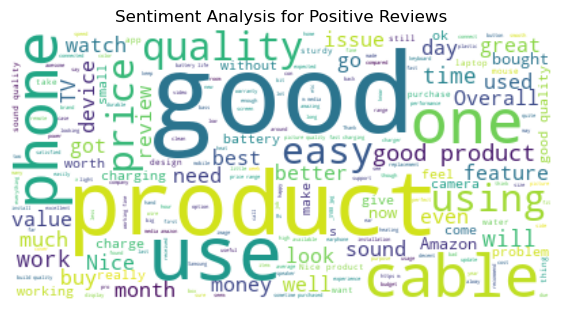

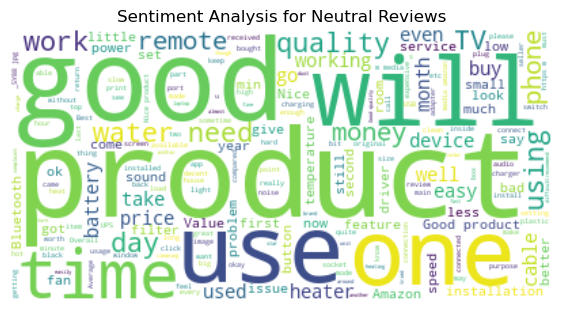

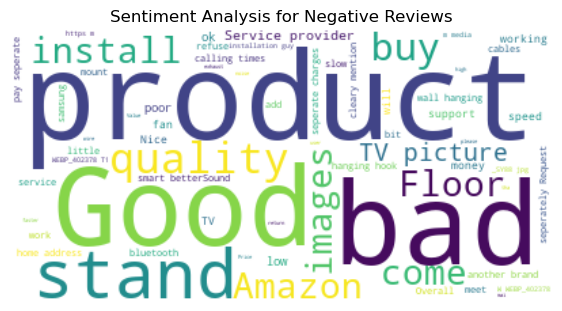

In [573]:
def generateWordCloud(sentimentValue):
    concatenateStr = ' '.join(reviewContent for reviewContent in ecommerceData[ecommerceData['review_sentiment'] == sentimentValue]['review_content'])
    wordCloud = WordCloud(collocations = True, background_color = 'white').generate(concatenateStr)
    plt.figure(figsize = (7, 8))
    plt.imshow(wordCloud, interpolation = 'bilinear')
    plt.title(f"Sentiment Analysis for {sentimentValue} Reviews")
    plt.axis('off')
    plt.show()

for reviewSentiment in ['Positive', 'Neutral', 'Negative']:
    # print(reviewSentiment)
    generateWordCloud(reviewSentiment)

#### -Sentiment Analysis for Positive Reviews
The sentiment analysis for __positive reviews__ highlights key terms such as __“Good”, “Best”, “Nice” and Great”__ indicating __high customer satisfaction__. Words like __“Quality”, “Value” and “Better”__ suggest appreciation for __product functionality and cost-effectiveness__. Terms related to customer service, like __“friendly” and “support”__, emphasize a __positive buying experience__. This visualization succinctly captures the attributes most valued by customers.

#### -Sentiment Analysis for Neutral Reviews
The sentiment analysis for __neutral reviews__ shows words like __“good”, “working”, “price” and “small”__ indicating a __balanced sentiment among customers__. This visualization offers insights into customer perceptions that are neither overly positive nor negative, pinpointing areas where enhancements could potentially improve satisfaction levels.

#### -Sentiment Analysis for Negative Reviews
The sentiment analysis for __negative reviews__ reveals common complaints like __“bad”, “low”, “slow”, “poor” and “little”__ reflecting __dissatisfaction with product quality__. This visualization highlights areas needing improvement to address customer issues effectively.

### Distribution of Reviews by Category using Pie Chart

In [491]:
contingencyCategoryReviewTable = pd.crosstab(ecommerceData['category'], ecommerceData['review_sentiment'])
contingencyCategoryReviewTable

review_sentiment,Negative,Neutral,Positive
category,,,
Car & Motorbike,0,0,1
Computers & Accessories,1,26,426
Electronics,6,22,498
Health & Personal Care,0,0,1
Home & Kitchen,4,50,394
Home Improvement,0,0,2
Musical Instruments,0,0,2
Office Products,0,2,29
Toys & Games,0,0,1


In [492]:
categoriesReview = contingency_table[(contingencyCategoryReviewTable['Positive'] > 0) & (contingencyCategoryReviewTable['Neutral'] > 0) & (contingencyCategoryReviewTable['Negative'] > 0)]
categoriesReview

review_sentiment,Negative,Neutral,Positive
category,,,
Computers & Accessories,1,26,426
Electronics,6,22,498
Home & Kitchen,4,50,394


In [493]:
categoriesReview = categoriesReview.reset_index()
meltedCategoriesReview = categoriesReview.melt(id_vars = 'category', var_name = 'review_sentiment', value_name = 'count')
meltedCategoriesReview

,category,review_sentiment,count
0,Computers & Accessories,Negative,1
1,Electronics,Negative,6
2,Home & Kitchen,Negative,4
3,Computers & Accessories,Neutral,26
4,Electronics,Neutral,22
5,Home & Kitchen,Neutral,50
6,Computers & Accessories,Positive,426
7,Electronics,Positive,498
8,Home & Kitchen,Positive,394


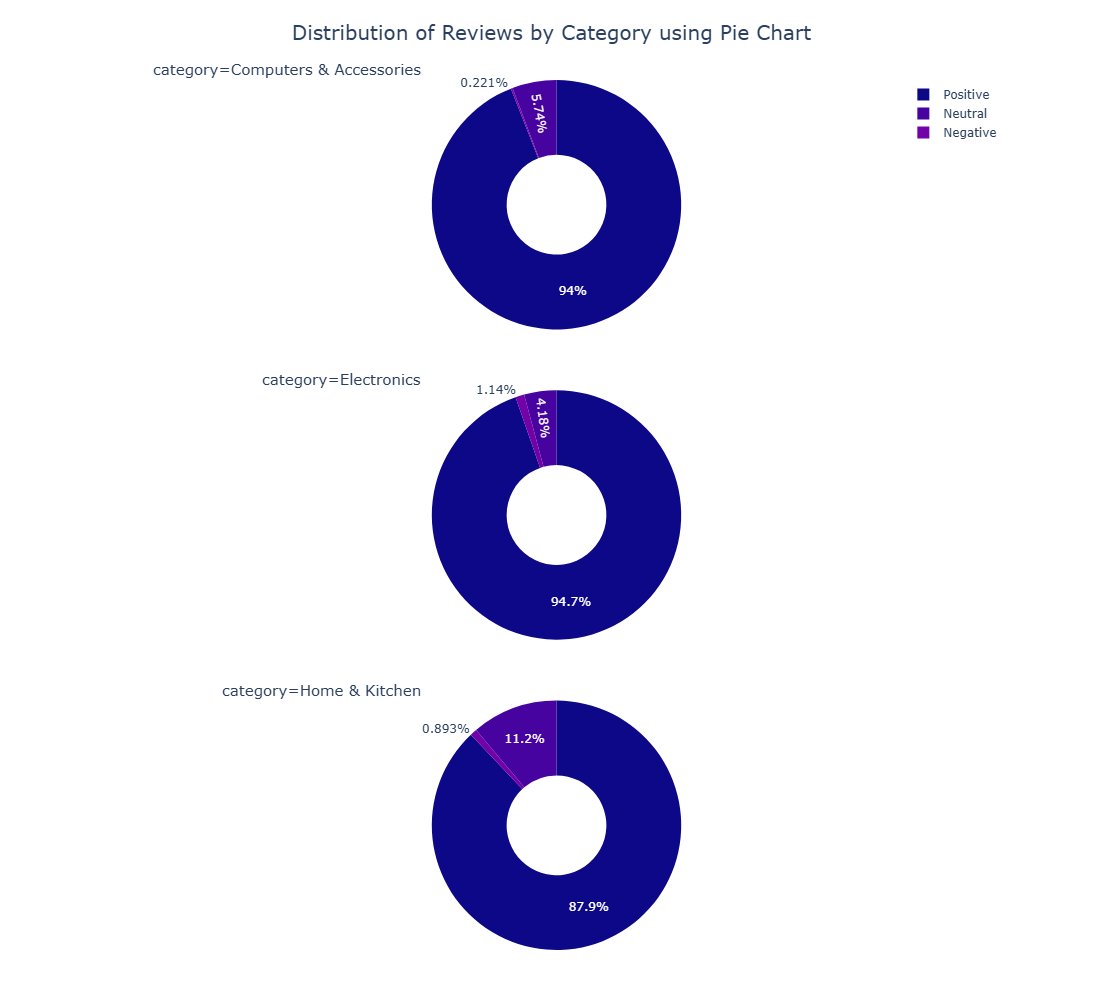

In [524]:

fig = pt.pie(data_frame = meltedCategoriesReview, names = "review_sentiment", values = 'count', color_discrete_sequence = pt.colors.sequential.Plasma, 
             title = "Distribution of Reviews by Category using Pie Chart", 
             facet_col = 'category', 
             facet_col_wrap = 1, width = 1200, height = 1000, hole = .4)

fig.update_layout(
    title = dict(font = dict(size =20), x = 0.5),
    margin = dict(t = 80, l =25, r = 25, b = 50),
    annotations = [dict(
        showarrow = False,
        x = 0.30,
        font = dict(size = 15),
        xanchor = "right",
        yanchor = "bottom",
    )]
)

fig.show()

#### Computers & Accessories Category:
In the __Computers & Accessories__ category:
- __Positive Reviews:__ Represented the highest proportion of reviews at __94%__, indicating strong satisfaction levels.
- __Neutral Reviews:__ Accounted for __5.74%__ of the reviews, suggesting a moderate sentiment without strong opinions.
- __Negative Reviews:__ Represented a minimal __0.221%__ of the reviews, indicating few dissatisfaction concerns.

#### Electronics Category:
In the __Electronics__ category:
- __Positive Reviews:__ Represented the highest proportion of reviews at __94.7%__, showing significant satisfaction among customers.
- __Neutral Reviews:__ Accounted for __4.18%__ of the reviews, indicating a balanced sentiment.
- __Negative Reviews:__ Represented a minimal __1.14%__ of the reviews, suggesting some areas of dissatisfaction.

#### Home & Kitchen Category:
In the __Home & Kitchen__ category:
- __Positive Reviews:__ Made up __87.9%__ of the reviews, indicating overall satisfaction.
- __Neutral Reviews:__ Accounted for __11.2%__ of the reviews, suggesting a moderate sentiment.
- __Negative Reviews:__ Represented a minimal __0.893%__ of the reviews, indicating minimal dissatisfaction concerns.




### Negative Product Reviews by Type and Category using Pie Chart

In [513]:

negativeReviewProduct = ecommerceData.loc[ecommerceData['review_sentiment'] == "Negative",['category', 'product_type', 'review_content']]
negativeReviewProduct

,category,product_type,review_content
22,Electronics,"Home Theater,TV & Video","Overall good.,TV picture ok smart betterSound ..."
145,Electronics,"Home Theater,TV & Video","Value of money,Usually gd,Good Product,Good,Q..."
152,Electronics,"Home Theater,TV & Video","Overall good.,TV picture ok smart betterSound ..."
155,Electronics,"Home Theater,TV & Video","tv on off not working, so difficult to battery..."
275,Electronics,"Home Theater,TV & Video","Ok,Very disappointedRange is not good it doesn..."
723,Electronics,"Home Theater,TV & Video","Overall good.,TV picture ok smart betterSound ..."
738,Computers & Accessories,Accessories & Peripherals,"Price is high,https://m.media-amazon.com/image..."
1198,Home & Kitchen,"Heating,Cooling & Air Quality","not a eassy to bare this product , in this pro..."
1237,Home & Kitchen,"Heating,Cooling & Air Quality","Like and happy,,Please don't buy this heater, ..."
1367,Home & Kitchen,"Heating,Cooling & Air Quality",This product of yours company is heating 5 lit...


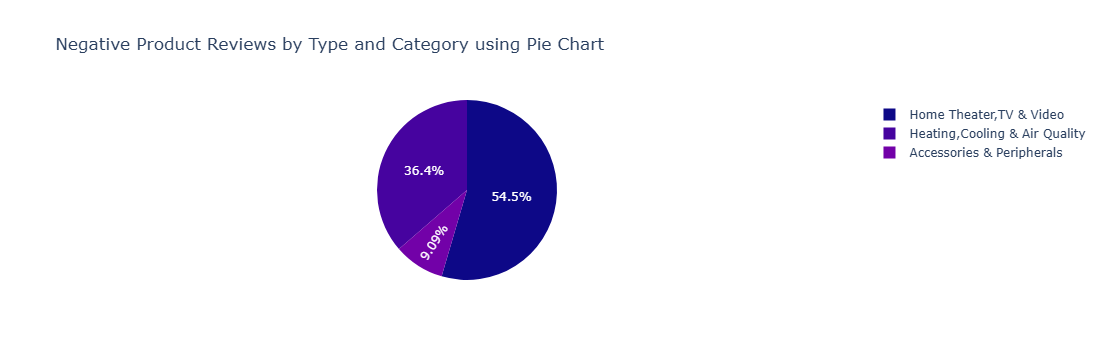

In [522]:
fig = pt.pie(data_frame = negativeReviewProduct, names = "product_type", color_discrete_sequence = pt.colors.sequential.Plasma, 
             title = "Negative Product Reviews by Type and Category using Pie Chart", hover_data = {"category": True})
fig.show()

#### 
The __pie chart__ visualizes negative reviews across different product types within the specified categories.
- __Home, Theater, TV and Video:__ This product type accounted for the highest percentage of negative reviews at 54.5%, indicating common issues or dissatisfaction with these products.
- __Heating, Cooling & Air Quality:__ This product type represented the 36.4% of negative reviews, suggesting areas where customers experience disappointment or dissatisfaction.
- __Accessories & Peripheral:__ This product type represented the remaining 9.09% of negative reviews, indicating specific areas that may require attention or improvement based on customer feedback.
  
This visualization helps identify which product types within each category receive the highest proportion of negative feedback, providing insights into potential areas for improvement or customer concerns. 


## Statistical Analysis
### Independent T Test for Category and Discounted Price

In [238]:
alpha = 0.05

category1 = ecommerceData[ecommerceData['category'] ==  'Computers & Accessories']
category2 = ecommerceData[ecommerceData['category'] == 'Home & Kitchen']

category1_discountPrice = category1['discounted_price']
category2_discountPrice = category2['discounted_price']

category1_val = np.array(category1_discountPrice)
category2_val = np.array(category2_discountPrice)

t_stat, p_value = stats.ttest_ind(a = category1_val, b = category2_val, equal_var = True)

print(t_stat, p_value)

-7.513702125940185 1.3872665020899906e-13


In [239]:
if p_value < alpha:
    print(f"Reject the Null Hypothesis at alpha : {alpha}")
else:
    print(f"Fail to Reject the Null Hypothesis at alpha : {alpha}")

Reject the Null Hypothesis at alpha : 0.05


### Chi Square Test for Category and Review Sentiment

In [240]:
contingency_table = pd.crosstab(ecommerceData['category'], ecommerceData['review_sentiment'])
print(contingency_table, "\n")

chiSquareTest = chi2_contingency(contingency_table, correction = False)

# print(chiSquareTest)

print("Chi Square Statistic:", round(chiSquareTest[0], 2))
print("p-value:", round(chiSquareTest[1], 4))
print("Degrees of Freedom (DOF):", chiSquareTest[2])
print("Excepted Frequency:", np.round(chiSquareTest[3], 2))

Chi Square Statistic: 23.59
p-value: 0.0989
Degrees of Freedom (DOF): 16
Excepted Frequency: [[1.0000e-02 7.0000e-02 9.2000e-01]
 [3.4000e+00 3.0920e+01 4.1868e+02]
 [3.9500e+00 3.5900e+01 4.8615e+02]
 [1.0000e-02 7.0000e-02 9.2000e-01]
 [3.3600e+00 3.0580e+01 4.1406e+02]
 [2.0000e-02 1.4000e-01 1.8500e+00]
 [2.0000e-02 1.4000e-01 1.8500e+00]
 [2.3000e-01 2.1200e+00 2.8650e+01]
 [1.0000e-02 7.0000e-02 9.2000e-01]]


#### 
The __Chi-square statistic__ calculated was __23.59__ with a corresponding __p-value of 0.0989__ and __16 degrees of freedom__. 

This result suggests that there is no significant association between the categories (product types) and review sentiments (negative, neutral, positive) in the dataset at a 95% confidence level. 

Therefore, __we fail to reject the null hypothesis__, indicating that the observed frequencies align closely with the expected frequencies under the assumption of independence between product categories and review sentiments

- __Null Hypothesis(Ho)__: There is no association between the product categories and review sentiments .
- __Alternative Hypothesis(H1)__: There is an association between the product categories and review sentiments.


### Two-way ANOVA for Product Type, Review Sentiment and Discounted Price

In [241]:
anovaData = ecommerceData[['product_type', 'review_sentiment', 'discounted_price']]

anovaModel = ols('discounted_price ~ C(product_type) + C(review_sentiment) + C(product_type):C(review_sentiment)', data = anovaData).fit()

# anovaModel

anovaTable = sm.stats.anova_lm(anovaModel, typ = 2)
print(anovaTable)

                                           sum_sq      df             F  \
C(product_type)                      2.053857e+01    28.0  1.961325e-08   
C(review_sentiment)                  1.286762e+02     2.0  1.720307e-06   
C(product_type):C(review_sentiment)  5.682741e+08    56.0  2.713360e-01   
Residual                             5.306948e+10  1419.0           NaN   

                                       PR(>F)  
C(product_type)                      1.000000  
C(review_sentiment)                  0.999998  
C(product_type):C(review_sentiment)  0.928909  
Residual                                  NaN  


C:\Users\Logiya Vidhyapathy\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 56, but rank is 5



#### 

The __Two-way ANOVA__ results indicate that there are no statistically significant interactions between product types and review sentiments on discounted prices. 

- __Null Hypothesis (H0)__: There is no significant interaction effect between product type and review sentiment on discounted prices.
- __Alternative Hypothesis (H1)__: There is a significant interaction effect between product type and review sentiment on discounted prices.

- __Product Type__: The variation in discounted prices across different product types is not statistically significant __(0.928909 > 0.05)__.
- __Review Sentiment__: There is no significant difference in discounted prices based on different review sentiments __(0.928909 > 0.05)__.
- __Interaction Effect__: The interaction between product type and review sentiment also shows no significant influence on discounted prices __(0.928909 > 0.05)__.

Overall, neither product type nor review sentiment significantly affects discounted prices individually or in combination. 
